# Customer Churn Forecast

### Data Import

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
# show all the features 
pd.set_option('display.max_columns', None)
df = pd.read_csv(r"XGBoost_Customer_Churn_Analysis_Charts/data/table1.csv",encoding="UTF-8")
df.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,novoters,consuming_capacity,historyvisit_avghotelnum,cancelrate,historyvisit_visit_detailpagenum,delta_price1,price_sensitive,hoteluv,businessrate_pre,ordernum_oneyear,cr_pre,avgprice,lowestprice,firstorder_bu,customereval_pre2,delta_price2,commentnums_pre,customer_value_profit,commentnums_pre2,cancelrate_pre,novoters_pre2,novoters_pre,ctrip_profits,deltaprice_pre2_t1,lowestprice_pre,uv_pre,uv_pre2,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016/5/18,2016/5/18,0,NaN,NaN,NaN,1.04,NaN,22.0,NaN,1089.0,NaN,1933.0,NaN,NaN,1261.0,NaN,NaN,NaN,102.607,0.25,NaN,1.03,NaN,49.0,NaN,3.2,NaN,724.0,NaN,844.0,0.03,1335.0,1249.0,NaN,29.0,46.0,58.027,74.956,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016/5/18,2016/5/18,0,NaN,NaN,NaN,1.06,NaN,0.0,NaN,5612.0,NaN,6852.0,NaN,NaN,3205.0,NaN,NaN,NaN,278.373,0.51,NaN,1.07,NaN,619.0,NaN,4.9,NaN,5610.0,NaN,3789.0,0.21,5430.0,7829.0,NaN,-56.0,111.0,249.347,224.920,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016/5/18,2016/5/19,0,NaN,NaN,NaN,1.05,NaN,3.0,NaN,256.0,NaN,367.0,NaN,NaN,194.0,NaN,NaN,NaN,16.133,0.61,NaN,1.12,NaN,312.0,NaN,3.9,NaN,4721.0,NaN,4341.0,0.52,5353.0,7324.0,NaN,8.0,413.0,133.093,112.063,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016/5/18,2016/5/18,0,NaN,NaN,NaN,1.01,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.780,NaN,NaN,1.01,NaN,198.0,NaN,2.1,NaN,41.0,NaN,529.0,0.53,1004.0,81.0,NaN,-7.0,188.0,4.600,58.844,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016/5/18,2016/5/19,0,NaN,NaN,NaN,1.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073,NaN,NaN,1.03,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,1.00,1.0,NaN,NaN,-5.0,NaN,0.213,0.157,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


In [8]:
# check the data dimension 
df.shape

(689945, 51)

In [9]:
# check the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   label                             689945 non-null  int64  
 1   sampleid                          689945 non-null  int64  
 2   d                                 689945 non-null  object 
 3   arrival                           689945 non-null  object 
 4   iforderpv_24h                     689945 non-null  int64  
 5   decisionhabit_user                385450 non-null  float64
 6   historyvisit_7ordernum            82915 non-null   float64
 7   historyvisit_totalordernum        386525 non-null  float64
 8   hotelcr                           689148 non-null  float64
 9   ordercanceledprecent              447831 non-null  float64
 10  landhalfhours                     661312 non-null  float64
 11  ordercanncelednum                 447831 non-null  f

In [10]:
# check the nulls in the datset 
df.isnull().mean()

label                               0.000000
sampleid                            0.000000
d                                   0.000000
arrival                             0.000000
iforderpv_24h                       0.000000
decisionhabit_user                  0.441332
historyvisit_7ordernum              0.879824
historyvisit_totalordernum          0.439774
hotelcr                             0.001155
ordercanceledprecent                0.350918
landhalfhours                       0.041500
ordercanncelednum                   0.350918
commentnums                         0.098437
starprefer                          0.326190
novoters                            0.024679
consuming_capacity                  0.327719
historyvisit_avghotelnum            0.437816
cancelrate                          0.016984
historyvisit_visit_detailpagenum    0.554698
delta_price1                        0.366405
price_sensitive                     0.327719
hoteluv                             0.001155
businessra

In [11]:
# check the distribution of "lable" 
df['label'].value_counts()

label
0    500588
1    189357
Name: count, dtype: int64

In [12]:
# Description Statistics
df.describe()

,label,sampleid,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,novoters,consuming_capacity,historyvisit_avghotelnum,cancelrate,historyvisit_visit_detailpagenum,delta_price1,price_sensitive,hoteluv,businessrate_pre,ordernum_oneyear,cr_pre,avgprice,lowestprice,firstorder_bu,customereval_pre2,delta_price2,commentnums_pre,customer_value_profit,commentnums_pre2,cancelrate_pre,novoters_pre2,novoters_pre,ctrip_profits,deltaprice_pre2_t1,lowestprice_pre,uv_pre,uv_pre2,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
count,689945.000000,6.899450e+05,689945.000000,385450.000000,82915.000000,386525.000000,689148.000000,447831.000000,661312.000000,447831.000000,622029.000000,464892.000000,672918.000000,463837.000000,387876.000000,678227.000000,307234.000000,437146.000000,463837.000000,689148.000000,483896.000000,447831.000000,660548.000000,457261.000000,687931.000000,376993.000000,661312.000000,437750.000000,598368.000000,439123.000000,648457.000000,653015.000000,657616.000000,648956.000000,445187.000000,543180.00000,659689.000000,660548.000000,661189.000000,660664.000000,447831.000000,602960.000000,682274.000000,651263.000000,592818.000000,457896.000000,689945.000000,5.929100e+05,689945.000000
mean,0.274452,6.285402e+05,0.193737,5.317048,1.856094,11.710487,1.060996,0.342119,6.086366,154.179369,1272.090888,67.532304,1706.247901,39.154140,6.510179,1051.604143,37.153603,79.067012,24.645863,95.092708,0.372717,11.642061,1.062906,422.458701,318.806242,11.697795,3.048519,77.277208,1415.159561,3.038409,1313.388737,0.344422,1787.197614,1890.698450,4.208495,3.28374,315.954583,107.846076,103.352990,318.541812,101830.919400,0.368237,10.648278,2.253250,12049.409382,1.137476,153.702414,1.855185e+04,14.462315
std,0.446238,4.146815e+05,0.395226,38.524483,2.103862,17.251429,0.045264,0.354210,12.413225,398.456986,2101.871601,19.175094,2811.690007,23.240147,41.045261,1509.066134,73.402891,512.942824,26.685606,169.981527,0.232791,17.137209,0.044588,290.853332,575.782415,2.746821,1.226635,391.413839,2329.418922,6.625281,1719.513354,0.179147,2316.712985,3116.120062,9.314438,48.80588,463.723643,186.731907,157.117863,351.913035,122784.313864,0.219945,15.696682,3.538453,25601.374138,0.204789,277.807697,2.288603e+05,6.301575
min,0.000000,2.463600e+04,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-99879.000000,0.000000,0.007000,0.000000,1.000000,1.000000,1.000000,-3.000000,1.000000,0.000000,-43344.000000,0.000000,-24.075000,0.000000,0.000000,1.000000,1.000000,-44.313000,-2296.00000,1.000000,0.007000,0.007000,1.000000,0.000000,0.000000,0.007000,0.007000,0.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,0.000000,3.123200e+05,0.000000,2.000000,1.000000,2.000000,1.030000,0.000000,0.000000,0.000000,115.000000,53.300000,157.000000,22.000000,2.000000,137.000000,6.000000,-31.000000,5.000000,10.427000,0.150000,2.000000,1.030000,232.000000,116.000000,12.000000,2.000000,-29.000000,137.000000,0.269000,270.000000,0.230000,391.000000,187.000000,0.340000,-3.00000,118.000000,12.533000,17.563000,145.000000,14999.000000,0.170000,0.827000,0.127000,551.000000,1.000000,17.000000,4.710000e+02,11.000000
50%,0.000000,5.996370e+05,0.000000,3.000000,1.000000,6.000000,1.050000,0.250000,0.000000,2.000000,514.000000,69.400000,692.000000,33.000000,4.000000,503.000000,18.000000,81.000000,16.000000,36.180000,0.390000,6.000000,1.060000,350.000000,200.000000,13.000000,3.000000,69.000000,592.000000,0.991000,768.000000,0.320000,1054.000000,783.000000,1.347000,2.00000,208.000000,42.500000,51.287000,233.000000,46890.000000,0.400000,3.527000,0.627000,2848.000000,1.050000,62.000000,1.315000e+03,15.000000
75%,1.000000,8.874600e+05,0.000000,5.000000,2.000000,14.000000,1.090000,0.570000,4.000000,153.000000,1670.000000,80.300000,2196.000000,51

###  Data Wrangling 

In [13]:
# copy the data 
rawdf=df.copy()

In [14]:
## add new column
# transform the data type 
rawdf['arrival']=pd.to_datetime(rawdf['arrival'])
rawdf['d']=pd.to_datetime(rawdf['d'])
# form a new column--Derived variables
rawdf['day_advanced']=(rawdf['arrival']-rawdf['d']).dt.days

## delet the column 
rawdf=rawdf.drop(['sampleid','d','arrival'],axis=1)

#### Deal with the Outliers
* Treat the negative values in customer_value_profit, ctrl_profits as 0 
* Treat the negative values in delta_price1, delta_price2, and lowestprice as the median

In [15]:
filter_one=['customer_value_profit','ctrip_profits']
filter_two=['delta_price1','delta_price2','lowestprice']

for f in filter_one:
    rawdf.loc[rawdf[f]<0,f] = 0

for f in filter_two:
    rawdf.loc[rawdf[f]<0,f] = rawdf[f].median()

rawdf[['customer_value_profit','ctrip_profits','delta_price1','delta_price2','lowestprice']].describe()

,customer_value_profit,ctrip_profits,delta_price1,delta_price2,lowestprice
count,439123.000000,445187.000000,437146.000000,437750.000000,687931.000000
mean,3.052456,4.230381,185.575634,165.948203,318.806537
std,6.616664,9.295756,220.489219,208.615285,575.782302
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.269000,0.340000,81.000000,69.000000,116.000000
50%,0.991000,1.347000,81.000000,69.000000,200.000000
75%,3.138000,4.320000,226.000000,198.000000,380.000000
max,598.064000,600.820000,5398.000000,5114.000000,100000.000000


#### Deal with the Nulls

In [16]:
# Define the function that removes the row of null values 
def nan_drop(df, axi, rate=0.5):
    df.dropna(axis=axi,thresh=df.shape[1-axi]*rate,inplace=True)
    
# Delete rows and columns with a percentage of missing values greater than 80%
print('The data dimension before deleting the null value is:{}'.format(rawdf.shape))

nan_drop(rawdf,axi=0,rate=0.2)
nan_drop(rawdf,axi=1,rate=0.2)

print('The data dimension after deleting the null value is:{}'.format(rawdf.shape))

The data dimension before deleting the null value is:(689945, 49)
The data dimension after deleting the null value is:(689845, 48)


* Fields that tend to be normally distributed are filled with the mean: businessrate_pre2, cancelrate_pre, businessrate_pre;
* Fields that are skewed are filled with the median.

In [17]:
def nan_fill(df):
    filter_mean=['businessrate_pre2','cancelrate_pre','businessrate_pre']
    for col in df.columns:
        if col in filter_mean:
            df[col]=df[col].fillna(df[col].mean())
        else:
            df[col]=df[col].fillna(df[col].median())
    return df

rawdf=nan_fill(rawdf)

#### Deal with the Extreme Values

In [18]:
for i in rawdf.columns:
    rawdf.loc[rawdf[i]<np.percentile(rawdf[i],1),i]=np.percentile(rawdf[i],1)
    rawdf.loc[rawdf[i]>np.percentile(rawdf[i],99),i]=np.percentile(rawdf[i],99)

### Check out the  Correlation between the Features 

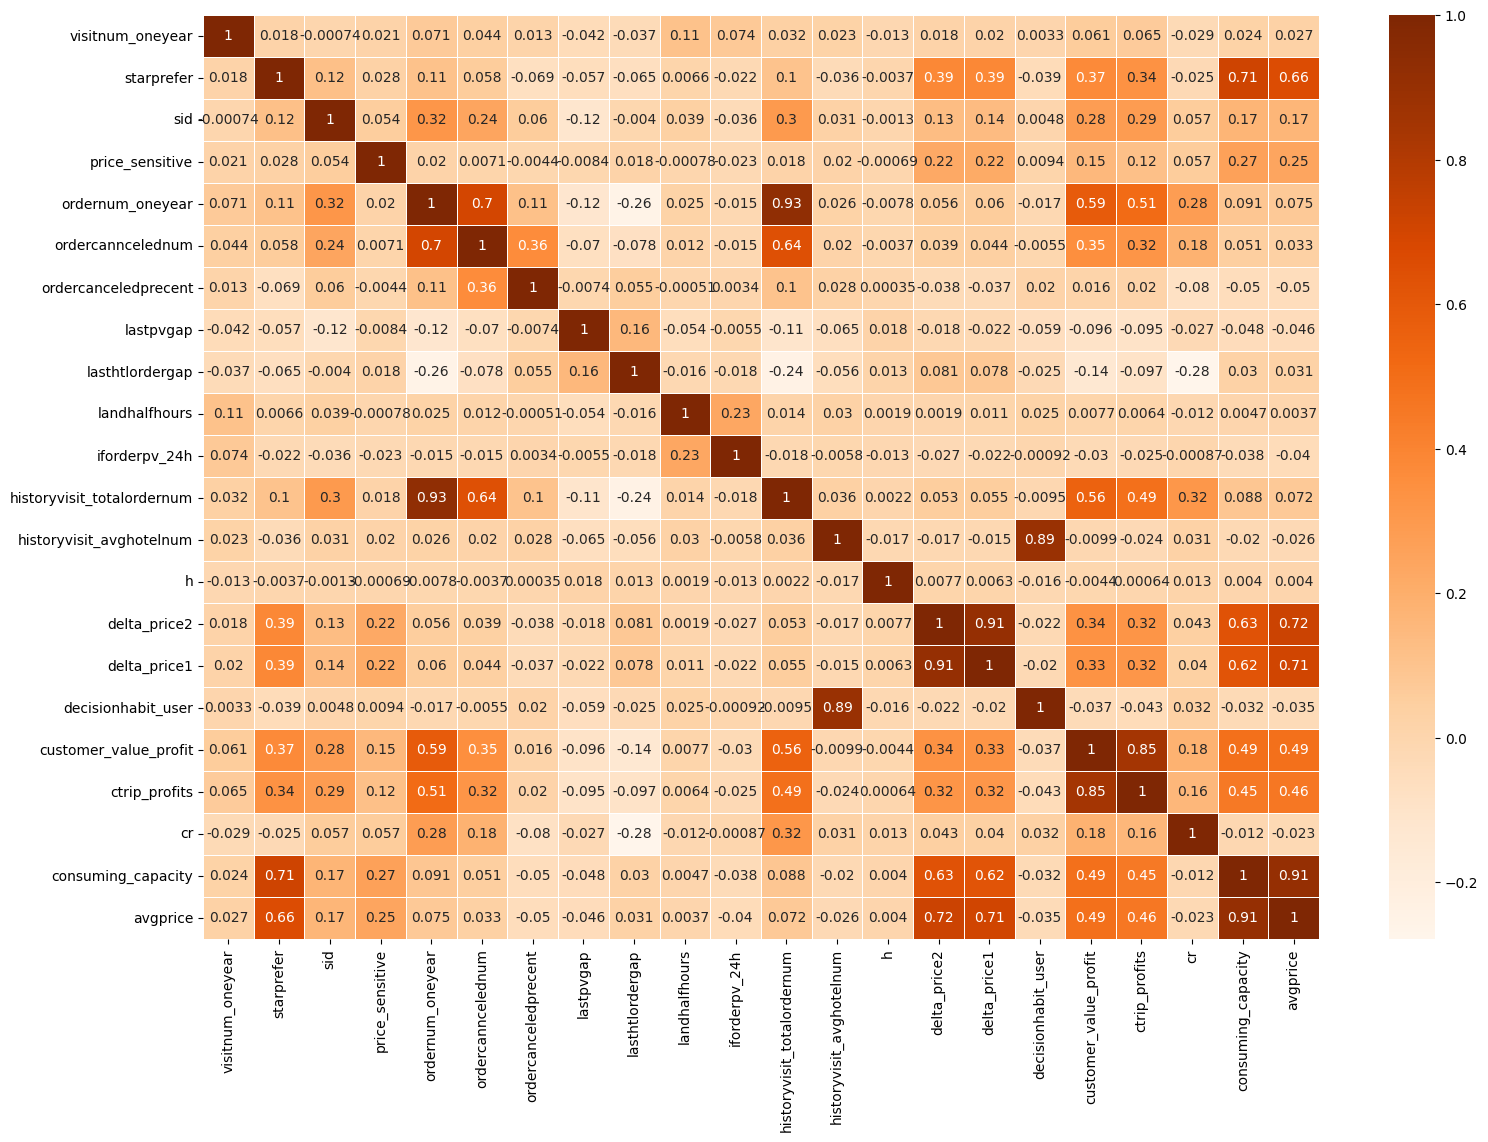

In [19]:
# Correlation analysis of user characteristics
# User Feature Extraction
user_features=['visitnum_oneyear','starprefer','sid','price_sensitive','ordernum_oneyear','ordercanncelednum','ordercanceledprecent','lastpvgap',
               'lasthtlordergap','landhalfhours','iforderpv_24h','historyvisit_totalordernum','historyvisit_avghotelnum','h',
               'delta_price2','delta_price1','decisionhabit_user','customer_value_profit','ctrip_profits','cr','consuming_capacity','avgprice']
# Generate correlation matrix of user features
corr_mat=rawdf[user_features].corr()

# Plotting the relevance matrix heat map of user features
fig,ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr_mat, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Oranges')
#plt.savefig('XGBoost_Customer_Churn_Analysis_Data/charts/User Feature Correlation Heatmap.jpg',dpi=400, bbox_inches='tight')
plt.show()

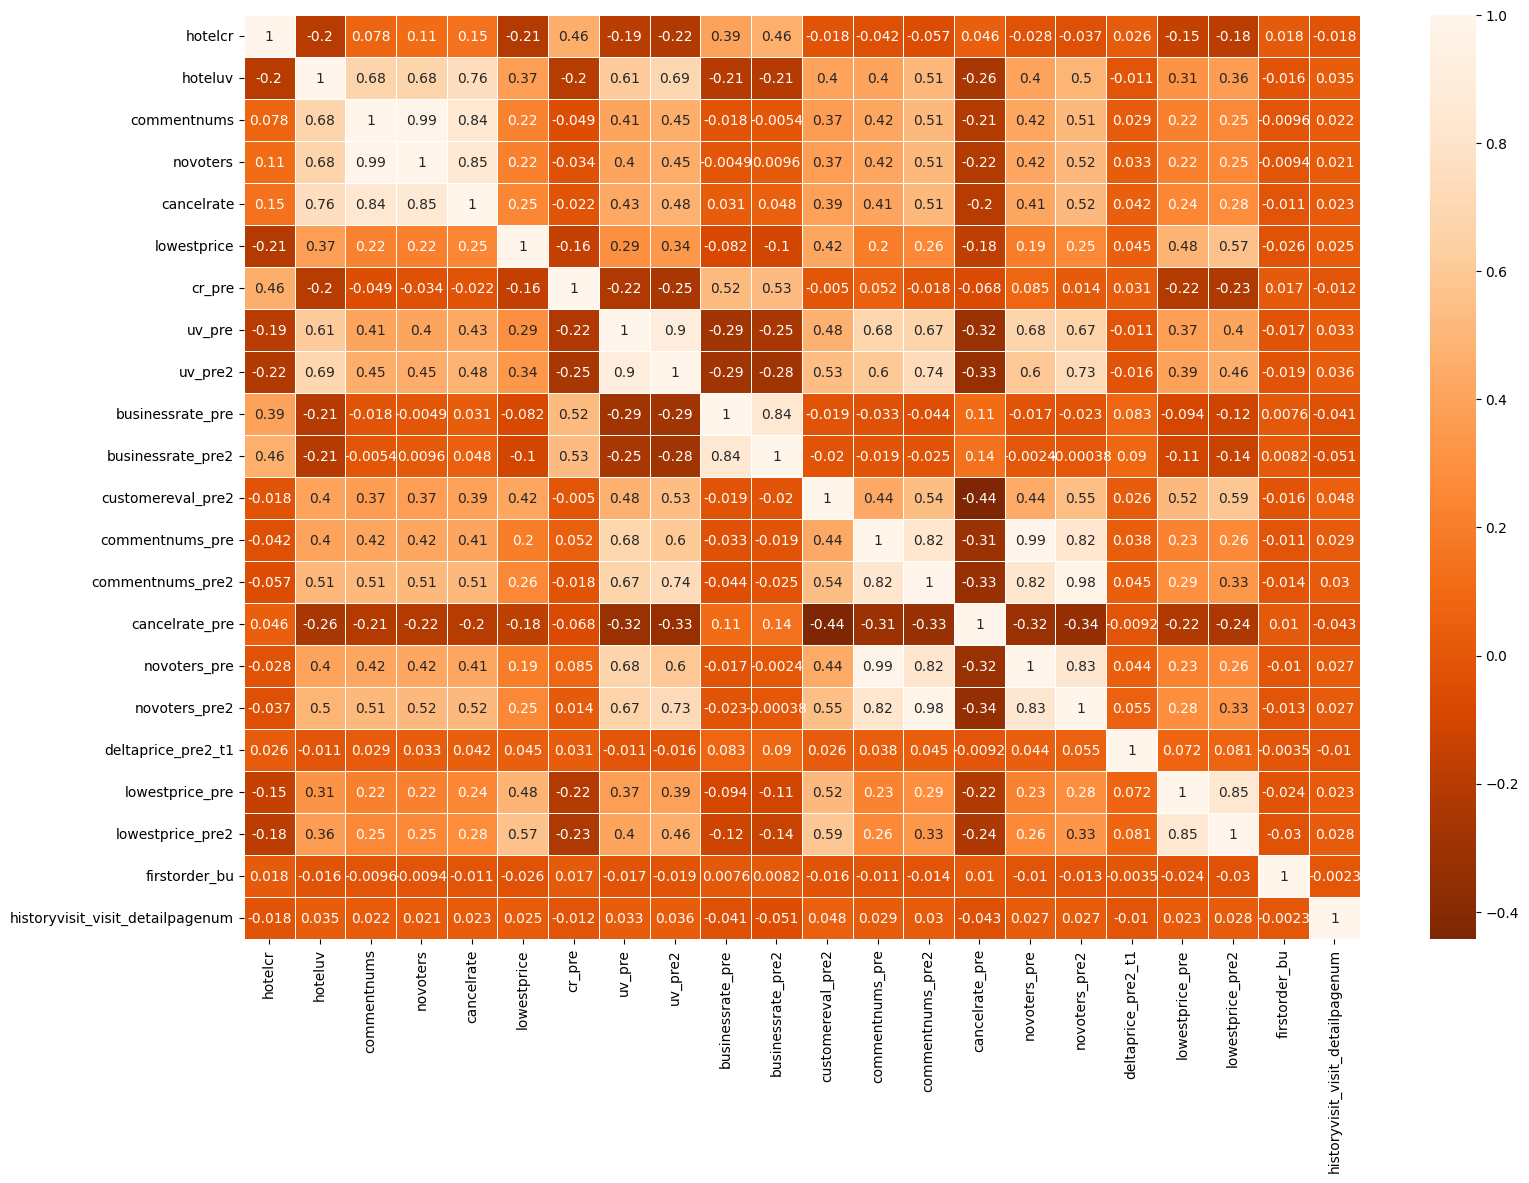

In [20]:
# Correlation analysis of hotel information characteristics
hotel_features=['hotelcr','hoteluv','commentnums','novoters','cancelrate','lowestprice','cr_pre','uv_pre','uv_pre2','businessrate_pre',
                'businessrate_pre2','customereval_pre2','commentnums_pre','commentnums_pre2','cancelrate_pre','novoters_pre','novoters_pre2',
                'deltaprice_pre2_t1','lowestprice_pre','lowestprice_pre2','firstorder_bu','historyvisit_visit_detailpagenum']
# Generate correlation matrix of user features
corr_mat1=rawdf[hotel_features].corr()

fig,ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr_mat1, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Oranges_r')
#plt.savefig('XGBoost_Customer_Churn_Analysis_Data/charts/Hotel Info Correlation Heatmap.jpg',dpi=400, bbox_inches='tight')
plt.show()

### Data Dimensionality Reduction (PCA)

In [21]:
c_value=['customer_value_profit','ctrip_profits']                   # user value 
consume_level=['avgprice','consuming_capacity']                     # user consuming level
price_prefer=['delta_price1','delta_price2']                        # user preference 
hotel_hot=['commentnums','novoters']                                # how welcomed the hotel is  
hotel_hot_pre=['commentnums_pre','novoters_pre']                    # the most visited hotel in 24 hours
hotel_hot_pre2=['commentnums_pre2','novoters_pre2']                 # average hotness of hotels viewed in 24 hours 

from sklearn.decomposition import PCA
pca=PCA(n_components=1)
rawdf['c_value']=pca.fit_transform(rawdf[c_value])
rawdf['consume_level']=pca.fit_transform(rawdf[consume_level])
rawdf['price_prefer']=pca.fit_transform(rawdf[price_prefer])
rawdf['hotel_hot']=pca.fit_transform(rawdf[hotel_hot])
rawdf['hotel_hot_pre']=pca.fit_transform(rawdf[hotel_hot_pre])
rawdf['hotel_hot_pre2']=pca.fit_transform(rawdf[hotel_hot_pre2])

rawdf.drop(c_value,axis=1,inplace=True)
rawdf.drop(consume_level,axis=1,inplace=True)
rawdf.drop(price_prefer,axis=1,inplace=True)
rawdf.drop(hotel_hot,axis=1,inplace=True)
rawdf.drop(hotel_hot_pre,axis=1,inplace=True)
rawdf.drop(hotel_hot_pre2,axis=1,inplace=True)
rawdf.drop('historyvisit_totalordernum',axis=1,inplace=True)  ##drop the repeated columns
print('The dimensionality of data after PCA：{}'.format(rawdf.shape))

The dimensionality of data after PCA：(689845, 41)


### Data Standardization

In [22]:
# Data standardization
from sklearn.preprocessing import StandardScaler

y=rawdf['label']
x=rawdf.drop('label',axis=1)

scaler = StandardScaler()
scaler.fit(x)

X= scaler.transform(x)

### XGBoost Model Training and Evaluation 

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=420)

In [25]:
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report

#  read in the training dataset and the test dataset 
dtrain=xgb.DMatrix(X_train,y_train)
dtest=xgb.DMatrix(X_test)

# set the parameters of xgboost model
params={'booster':'gbtree','objective': 'binary:logistic','eval_metric': 'auc',
    'max_depth':8,'gamma':0,'lambda':2,'subsample':0.7,'colsample_bytree':0.8,
    'min_child_weight':3,'eta': 0.2,'nthread':8,'verbosity':0}

# train the model 
watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=10,evals=watchlist)

# The probability value that the input prediction is a positive class 
y_prob=bst.predict(dtest)

# set the shreshold to be 0.5, and the get the results of the prediction
y_pred = (y_prob >= 0.5)*1

# Obtain true positive rate, false positive rate, threshold value 
fpr_xgb,tpr_xgb,threshold_xgb = metrics.roc_curve(y_test,y_prob)   
auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)    # AUC score
score_xgb = metrics.accuracy_score(y_test,y_pred)    # Model Accuracy
print('Model Accuracy is:{0},AUC score is:{1}'.format(score_xgb,auc_xgb))
print('============================================================')
print(classification_report(y_test,y_pred,labels=None,target_names=None,sample_weight=None, digits=2))

[0]	train-auc:0.71024
[1]	train-auc:0.73955
[2]	train-auc:0.74682
[3]	train-auc:0.74978
[4]	train-auc:0.75426
[5]	train-auc:0.75832
[6]	train-auc:0.76224
[7]	train-auc:0.76447
[8]	train-auc:0.76709
[9]	train-auc:0.77080
Model Accuracy is:0.752669675386801,AUC score is:0.7606907903672665
              precision    recall  f1-score   support

           0       0.76      0.97      0.85    149761
           1       0.69      0.19      0.30     57193

    accuracy                           0.75    206954
   macro avg       0.72      0.58      0.57    206954
weighted avg       0.74      0.75      0.70    206954



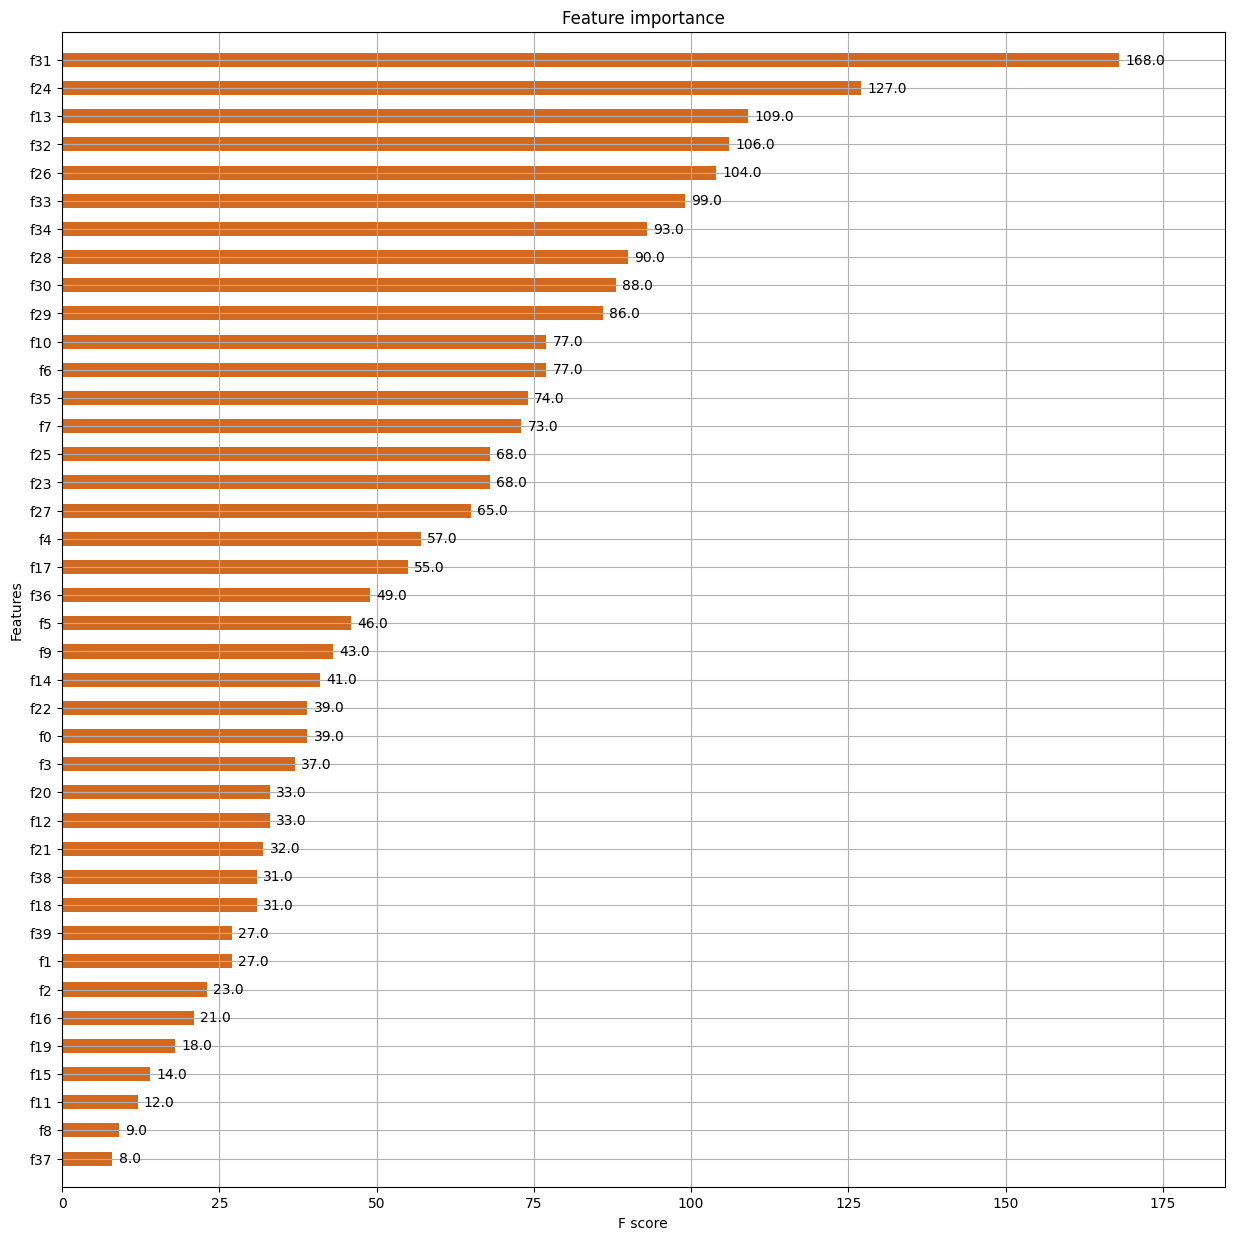

In [28]:
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(bst,height=0.5,ax=ax,max_num_features=40,color='chocolate')
#plt.savefig('XGBoost_Customer_Churn_Analysis_Charts/Feature Importance Chart.jpg',dpi=400, bbox_inches='tight')
plt.show()

* Important features include whether the user visited the order filling page within the last 24 hours (**iforderpv_24h**), which indicates recent engagement and intent to book; the average number of hotel visits by the user per day over the past 3 months (**historyvisit_avghotelnum**), showing the user’s general browsing activity and interest in hotels; the current hotel conversion rate (**hotelcr**), reflecting the percentage of visits that resulted in bookings; and the historical order cancellation rate for the current hotel (**ordercanceledprecent**), indicating how often users cancel bookings at this hotel. Additional key factors include the user's preference for hotel star ratings (**starprefer**), which can reflect their quality expectations or budget; the user's overall cancellation rate across previous bookings (**cancellationrate**), showing how likely they are to cancel reservations; the number of visits to detailed hotel pages by the user (**historyvisit_visit_detailpagenum**), which can indicate the level of interest and information seeking before making a decision; and the user's sensitivity to price changes (**price_sensitive**), based on past behavior. Also included are the unique visitor count for the current hotel (**hoteluv**), a measure of the hotel's popularity, and the business rate of the most viewed hotels in the last 24 hours (**businessrate_pre**), reflecting the user's interest in hotels that cater to business travelers or have business-oriented amenities.

## RFM Model 
* R(Rencency): Last consumption
* F(Frequency): Consumption frequency
* M(Monetary): Spending amount

The values of **lasthtlordergap (time since last order)**, **ordernum_oneyear (number of user annual orders)**, and **consumption_level (user consumption level)** are chosen as R, F, and M, respectively, for clustering the user groups.

In [30]:
rfm = rawdf[['lasthtlordergap','ordernum_oneyear','consume_level']]

# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(rfm)
rfm = pd.DataFrame(scaler.transform(rfm),columns=['recency','frequency','monetary'])

# Splitting boxes
rfm['R']=pd.qcut(rfm["recency"], 2)
rfm['F']=pd.qcut(rfm["frequency"], 2)
rfm['M']=pd.qcut(rfm["monetary"], 2)

# tokenization
from sklearn.preprocessing import LabelEncoder
rfm['R']=LabelEncoder().fit(rfm['R']).transform(rfm['R'])
rfm['F']=LabelEncoder().fit(rfm['F']).transform(rfm['F'])
rfm['M']=LabelEncoder().fit(rfm['M']).transform(rfm['M'])

def get_label(r,f,m):
    if (r==0)&(f==1)&(m==1):
        return 'Premium Customer'
    if (r==1)&(f==1)&(m==1):
        return 'Loyal Customer'
    if (r==0)&(f==0)&(m==1):
        return 'Growth Potential Customer'
    if (r==1)&(f==0)&(m==1):
        return 'Retention Focus Customer'
    if (r==0)&(f==1)&(m==0):
        return 'Value Customer'
    if (r==1)&(f==1)&(m==0):
        return 'Stable Customer'
    if (r==0)&(f==0)&(m==0):
        return 'Emerging Customer'
    if (r==1)&(f==0)&(m==0):
        return 'At-Risk Customer'

def RFM_convert(df):
    df['Label of Customer']=df.apply(lambda x:get_label(x['R'],x['F'],x['M']),axis=1)
    
    df['R']=np.where(df['R']==0,'High','Low')
    df['F']=np.where(df['F']==1,'High','Low')
    df['M']=np.where(df['M']==1,'High','Low')
    
    return df[['R','F','M','Label of Customer']]

rfm0=RFM_convert(rfm)
rfm0.head(10)

,R,F,M,Label of Customer
0,High,Low,Low,Emerging Customer
1,High,Low,Low,Emerging Customer
2,High,Low,Low,Emerging Customer
3,High,Low,Low,Emerging Customer
4,High,Low,Low,Emerging Customer
5,High,Low,Low,Emerging Customer
6,High,Low,Low,Emerging Customer
7,High,High,High,Premium Customer
8,High,Low,Low,Emerging Customer
9,High,High,Low,Value Customer


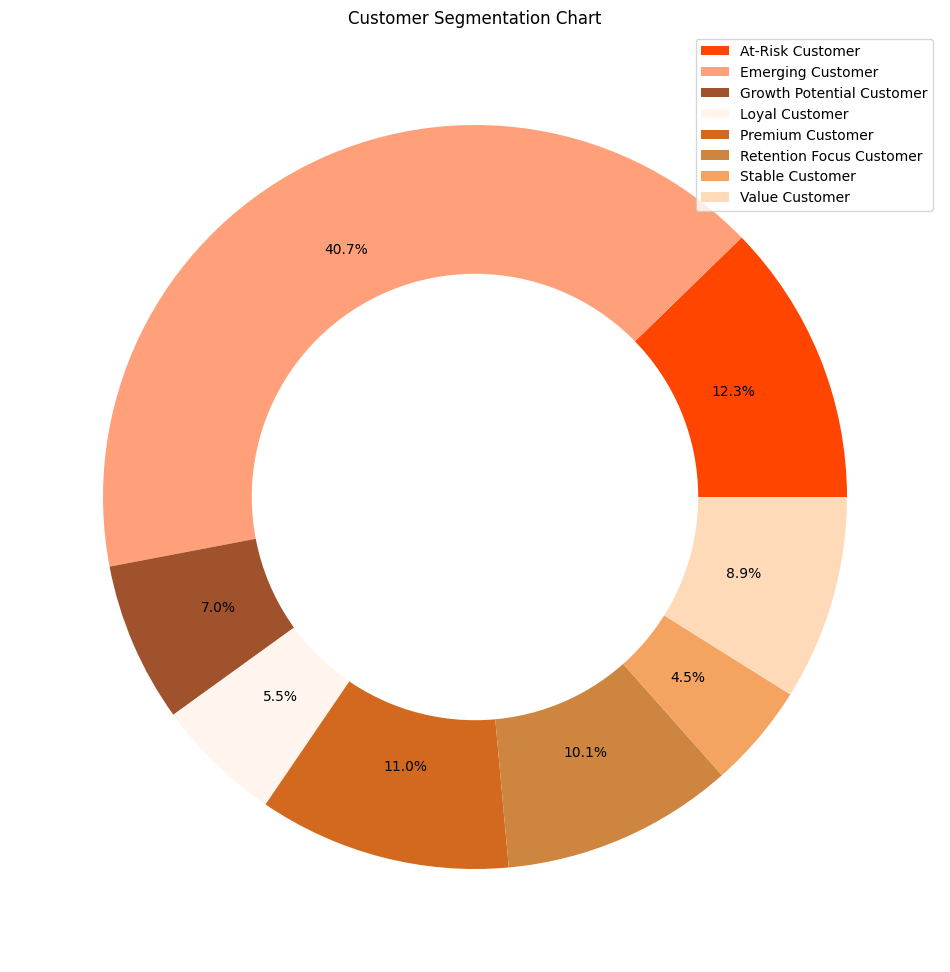

In [32]:
temp=rfm0.groupby('Label of Customer').size()

plt.figure(figsize=(12,18))
colors=['orangered','lightsalmon','sienna','seashell','chocolate','peru','sandybrown','peachpuff']
plt.pie(temp,radius=1,autopct='%.1f%%',pctdistance=0.75,colors=colors)
plt.pie([1],radius=0.6,colors='w')
plt.title('Customer Segmentation Chart')
plt.legend(temp.index)
plt.savefig('XGBoost_Customer_Churn_Analysis_Charts/Customer Segmentation.jpg',dpi=400, bbox_inches='tight')
plt.show()

Customer Segmentation Analysis

This donut chart visualizes customer segmentation based on their RFM (Recency, Frequency, Monetary) scores. Below is the interpretation of each segment:

1. **At-Risk Customer (12.3%)**
   - These customers have shown lower engagement or recency but still have some spending history. They are considered at risk of churning or disengaging completely.
   - **Action**: Focus on re-engagement strategies to retain these customers.

2. **Emerging Customer (8.9%)**
   - Relatively new or with lower engagement, these customers have potential to grow.
   - **Action**: Target these customers with special offers or promotions to increase their interaction and engagement.

3. **Growth Potential Customer (7.0%)**
   - These customers have high monetary value but lower recency or frequency.
   - **Action**: Focus on converting them into more frequent or loyal customers through personalized communication or incentives.

4. **Loyal Customer (40.7%)**
   - The largest segment, representing customers who regularly engage and spend with the business.
   - **Action**: Maintain their loyalty through rewards programs or personalized service.

5. **Premium Customer (5.5%)**
   - These top-tier customers provide significant value to the business through high engagement and spending.
   - **Action**: Prioritize retaining these customers by offering premium benefits or exclusive deals.

6. **Retention Focus Customer (4.5%)**
   - These customers have high value but low recent engagement.
   - **Action**: Implement personalized promotions or outreach to re-engage them before they churn.

7. **Stable Customer (10.1%)**
   - These customers have consistent engagement and spending, though not at the highest level.
   - **Action**: Continue offering value to maintain their steady contribution.

8. **Value Customer (11.0%)**
   - These customers provide decent engagement and spending but are not in the top tiers.
   - **Action**: Offer additional value propositions or promotions to increase their overall contribution.


Key Insights:
- **Loyal Customers** make up the largest portion (40.7%), indicating a strong presence of repeat customers who frequently engage with and contribute to the business.
- **At-Risk Customers** (12.3%) represent a significant portion, suggesting a need for re-engagement strategies.
- **Emerging Customers** (8.9%) and **Growth Potential Customers** (7.0%) could be areas for potential growth with proper nurturing.

### User Profiling

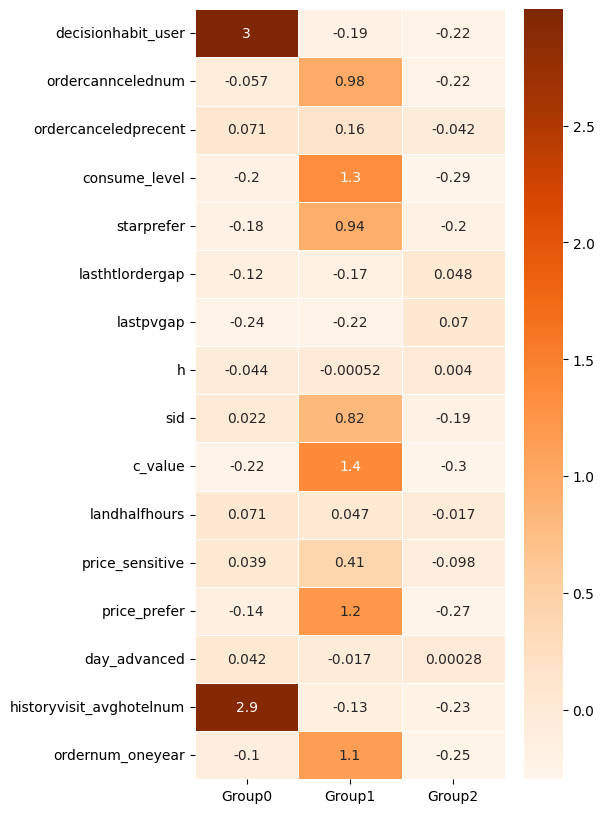

In [35]:
# Select a few important metrics that portray users
user_feature = ['decisionhabit_user','ordercanncelednum','ordercanceledprecent','consume_level','starprefer','lasthtlordergap','lastpvgap','h','sid',
                'c_value','landhalfhours','price_sensitive','price_prefer','day_advanced','historyvisit_avghotelnum','ordernum_oneyear']
user_attributes = rawdf[user_feature]
user_attributes.head()

# Data standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(user_attributes)

user_attributes = scaler.transform(user_attributes)

from sklearn.cluster import KMeans

Kmeans=KMeans(n_clusters=3)                                                     # build up KMean model
Kmeans.fit(user_attributes)                                                     # train the model
k_char=Kmeans.cluster_centers_                                                  # Get the center of mass of each classification
personas=pd.DataFrame(k_char.T,index=user_feature,columns=['Group0','Group1','Group2'])  # User profiling table

plt.figure(figsize=(5,10))
sns.heatmap(personas, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Oranges')
plt.savefig('XGBoost_Customer_Churn_Analysis_Charts/User Profile Heatmap.jpg',dpi=400, bbox_inches='tight')
plt.show()

#### Heatmap Interpretation

This heatmap visualizes the characteristics of three user groups (Group0, Group1, Group2) based on various features after applying K-Means clustering. The values in each cell represent the prominence of the feature for each group. Here's a brief summary:

Group 0:
- **High in "decisionhabit_user" (decision habits)** and **"historyvisit_avghotelnum" (average hotel visits)**. This indicates that users in this group frequently visit hotels and have strong decision-making habits.
- The other features are neutral or low, suggesting that their consumption behavior and preferences are relatively stable or moderate.

Group 1:
- **Low in "ordercanncelednum" (order cancellations)** and **"consume_level" (consumption level)**, showing that users in this group cancel fewer orders and have a lower overall consumption level.
- The values across all features are relatively balanced, indicating that these users have a moderate behavior pattern without strong tendencies in any particular feature.

Group 2:
- **High in "ordercanncelednum" (order cancellations)** and **"ordercanceledprecent" (order cancellation rate)**, suggesting that this group tends to cancel orders more frequently.
- **High in "consume_level" (consumption level)** and **"price_prefer" (price preference)**, indicating that these users have a higher spending power and are more sensitive to price.

Summary:
- **Group 0** users are frequent hotel browsers with strong decision habits.
- **Group 1** users show balanced behavior across most features and are more stable consumers.
- **Group 2** users tend to have high consumption but also exhibit higher cancellation rates and strong price sensitivity.


<Figure size 900x900 with 0 Axes>

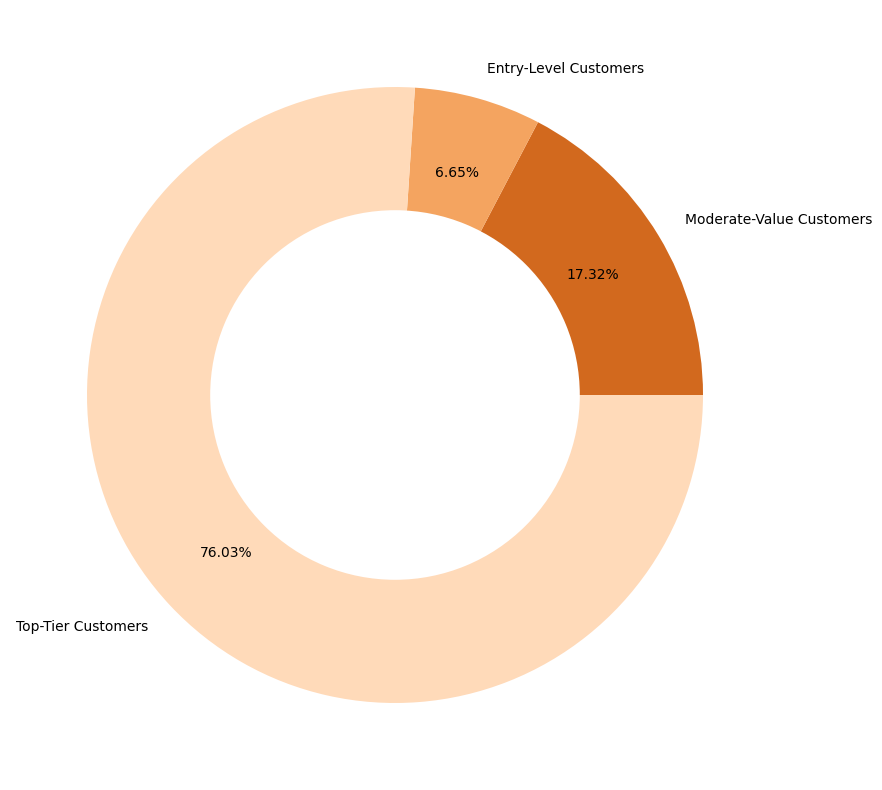

In [37]:
plt.figure(figsize=(9,9))

class_k=list(Kmeans.labels_)                          # Number of users per category
percent=[class_k.count(1)/len(user_attributes),class_k.count(0)/len(user_attributes),class_k.count(2)/len(user_attributes)]   # Number of users per category as a percentage

fig, ax = plt.subplots(figsize=(10,10))
colors=['chocolate','sandybrown','peachpuff']
types=['Moderate-Value Customers','Entry-Level Customers','Top-Tier Customers']
ax.pie(percent,radius=1,autopct='%.2f%%',pctdistance=0.75,colors=colors,labels=types)
ax.pie([1], radius=0.6,colors='w')
plt.savefig('XGBoost_Customer_Churn_Analysis_Charts/User Profile.jpg',dpi=400, bbox_inches='tight')
plt.show()

**Analysis of Top-Tier Customers**


Top-tier customers are characterized by their high consumption levels and preference for premium, high-quality hotels. They exhibit both high visit and booking frequencies, and tend to make quick decisions with shorter booking windows. Despite their fast decision-making (evidenced by fewer average daily visits), they also demonstrate a high order cancellation rate. This group is heavily associated with business-related travel, often booking at the last minute and cancelling when necessary due to their flexible travel schedules.

A majority of top-tier customers are repeat clients, exhibiting sensitivity to price but a preference for cost-effective yet high-quality products. Their booking behavior is often observed during off-peak hours, such as late at night or early in the morning.

Given their importance to the business, personalized marketing strategies should be implemented for this segment, including:

1. Providing more detailed information about hotels at their frequent travel destinations;
2. Recommending reputable, cost-effective business hotels or hotel chains to attract their attention;
3. Sending timely reminders during non-working day peak hours, such as at 11:00 AM and 5:00 PM.



**Analysis of Moderate-Value Customers**

Moderate-value customers exhibit lower overall consumption levels and do not prioritize high-end hotels. However, they have a high frequency of visits, and their booking windows are the longest of the three customer segments. This group tends to spend considerable time browsing hotels before making a decision, suggesting that they are cautious and deliberate in their choice. It is reasonable to infer that their bookings are often travel-related, reflecting a more considered approach to selecting accommodations.

To effectively engage moderate-value customers, the following strategies should be implemented:

1. Regularly send hotel information two to three weeks prior to holidays;
2. Promote high-end hotels and local travel destinations to capture their interest, as they are more likely to travel;
3. Collaborate with hotel agents in tourist areas to offer personalized recommendations, focusing on more affordable hotel options to align with their preferences.



**Analysis of Entry-Level Customers**

Entry-level customers exhibit minimal demand for high-end hotels and are primarily driven by lower prices. They have short decision-making times, low visit frequencies, and infrequent reservations. Many customers in this group are new, with their behavior suggesting a need for cultivating brand loyalty and engagement.

For this group, the following approaches are recommended:

1. Limit marketing expenditures for this segment while focusing on enhancing the initial customer experience through introductory offers or discounts to encourage repeat business. Regularly promote budget-friendly hotel options to develop their consumption habits;
2. Target this group with promotional content, such as major sales events, to capture their attention;
3. Given that this segment constitutes a large portion of the overall customer base, conducting churn analysis to understand the factors contributing to customer loss will help inform strategies to reduce attrition.